In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Data for 50kbp and all using the same 6 pathways from 50kbp
data_50kbp = {
    'Pathway': [
        'clearance of foreign\nintracellular DNA',
        'lymphocyte activation',
        'cytoskeleton-dependent cytokinesis',
        'Sleep regulation',
        'Leishmaniasis',
        'Regulatory circults of\nthe STAT3 signaling pathway'
    ],
    'Gene Ratio': [0.0311, 0.1118, 0.0373, 0.0248, 0.0311, 0.0311],
    'Count': [5, 18, 6, 4, 5, 5],
    'Q-value': [-6.58, -6.12, -1.99, -1.82, -1.79, -1.77]  # Log10(q)
}

data_all = {
    'Pathway': [
        'clearance of foreign\nintracellular DNA',
        'lymphocyte activation',
        'cytoskeleton-dependent cytokinesis',
        'Sleep regulation',
        'Leishmaniasis',
        'Regulatory circults of\nthe STAT3 signaling pathway'
    ],
    'Gene Ratio': [0.0273, 0.1038, 0.0328, 0.0219, 0.0273, 0.0273],
    'Count': [5, 19, 6, 4, 5, 5],
    'Q-value': [-6.30, -6.07, -1.76, -1.68, -1.57, -1.55]  # Log10(q)
}

# Convert to DataFrames
df_50kbp = pd.DataFrame(data_50kbp)
df_all = pd.DataFrame(data_all)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18868\219031519.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar and legend


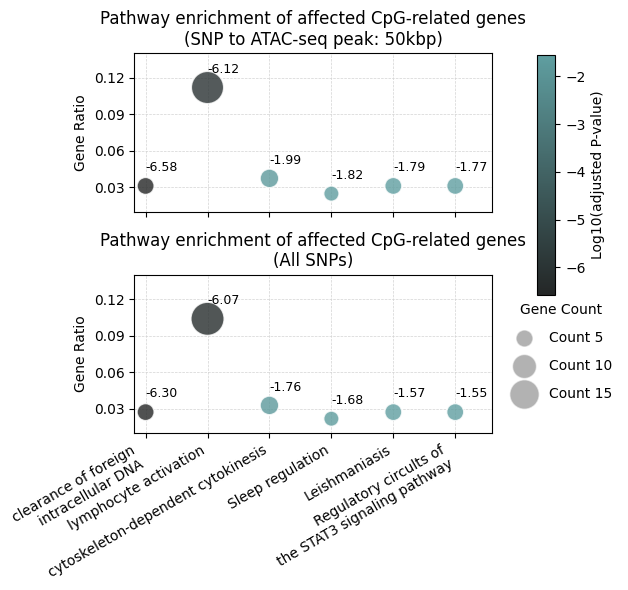

In [3]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

# Add light gray grid lines
for ax in axes:
    ax.grid(True, which='both', axis='both', color='lightgray', linestyle='--', linewidth=0.5, zorder=1)

# Darker Morandi-style colormap
morandi_cmap = sns.dark_palette("#5F9EA0", as_cmap=True)

# Plot for 50kbp (now transposed)
sc1 = axes[0].scatter(df_50kbp['Pathway'], df_50kbp['Gene Ratio'],
                      s=df_50kbp['Count']*30,  # Adjusting bubble size
                      c=df_50kbp['Q-value'], cmap=morandi_cmap, alpha=0.8, edgecolors="w", label="50kbp", zorder=3)
axes[0].set_title('Pathway enrichment of affected CpG-related genes\n(SNP to ATAC-seq peak: 50kbp)')
axes[0].set_ylabel('Gene Ratio')

# Plot for 'all' (now transposed)
sc2 = axes[1].scatter(df_all['Pathway'], df_all['Gene Ratio'],
                      s=df_all['Count']*30,  # Adjusting bubble size
                      c=df_all['Q-value'], cmap=morandi_cmap, alpha=0.8, edgecolors="w", label="all", zorder=3)
axes[1].set_title('Pathway enrichment of affected CpG-related genes\n(All SNPs)')
axes[1].set_ylabel('Gene Ratio')

# Adding Q-value text labels next to each bubble
for i in range(len(df_50kbp)):
    axes[0].text(df_50kbp['Pathway'][i], df_50kbp['Gene Ratio'][i] + 0.015,
                 f"{df_50kbp['Q-value'][i]:.2f}", fontsize=9, color="black", ha="left", va="center")
for i in range(len(df_all)):
    axes[1].text(df_all['Pathway'][i], df_all['Gene Ratio'][i] + 0.015,
                 f"{df_all['Q-value'][i]:.2f}", fontsize=9, color="black", ha="left", va="center")



# Reduce the number of y-axis ticks for a more compact view
for ax in axes:
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylim(0.01,0.14)
    ax.set_xlim(-0.18,5.6)

# Tilt the x-axis labels
plt.xticks(rotation=30, ha='right')

# Adjust spacing between x-axis labels for compactness
plt.subplots_adjust(hspace=0.3)

# Adding colorbar and placing it higher and shorter
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.5, 0.03, 0.4])  # Adjusted position: [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=morandi_cmap, norm=plt.Normalize(vmin=min(df_50kbp['Q-value'].min(), df_all['Q-value'].min()),
                                                                     vmax=max(df_50kbp['Q-value'].max(), df_all['Q-value'].max())))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Log10(adjusted P-value)')

# Adding a shared legend for bubble sizes and placing it higher
legend_ax = fig.add_axes([0.92, 0.33, 0.04, 0.15])  # Adjusted position: [left, bottom, width, height]
for size in [5, 10, 15]:
    legend_ax.scatter([], [], s=size*30, c="gray", label=f"Count {size}", alpha=0.6, edgecolors="w")
legend_ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Gene Count', loc='center')
legend_ax.axis('off')  # Hide axes for legend

# Adjust layout for a tighter fit
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for colorbar and legend
plt.savefig('images/GO-result.png',dpi=300, bbox_inches = 'tight')
plt.show()